In [39]:
# Import necessary libs 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Importing and exploring dataset

In [25]:
# Read in data and preview rows and columns of dataset 
df_assets = pd.read_csv('hazard_for_challenge.csv', parse_dates=True)
print(df_assets.shape)

(2100, 30)


Looking at a preview of the data, we see that the failure probability for each asset is recorded from October 27th, 2012 - Nov 9th, 2012 (assuming dates are in MM/DD/YY format). 

In [153]:
df_assets.head(5)

,reference,longitude,latitude,10/27/12 0:00,10/27/12 12:00,10/28/12 0:00,10/28/12 12:00,10/29/12 0:00,10/29/12 12:00,10/30/12 0:00,...,11/4/12 12:00,11/5/12 0:00,11/5/12 12:00,11/6/12 0:00,11/6/12 12:00,11/7/12 0:00,11/7/12 12:00,11/8/12 0:00,11/8/12 12:00,11/9/12 0:00
0,asset_1,-73.932491,40.795385,0.000080,0.000080,0.000080,0.000080,0.000080,0.000092,0.000092,...,0.000095,0.000095,0.000095,0.000095,0.000095,0.000095,0.000095,0.000095,0.000095,0.000095
1,asset_2,-74.005356,40.756943,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
2,asset_3,-73.976609,40.790758,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,...,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021
3,asset_4,-73.945386,40.783956,0.000156,0.000156,0.000156,0.000156,0.000156,0.000156,0.000156,...,0.000157,0.000157,0.000157,0.000157,0.000157,0.000157,0.000157,0.000157,0.000157,0.000157
4,asset_5,-73.915991,40.870123,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,...,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016


Here we see that there are no null values and also that every column besides the first is a numerical value, allowing us to explore a stastical summary of the average health of assets at each timestamp. 

In [27]:
df_assets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reference       2100 non-null   object 
 1   longitude       2100 non-null   float64
 2   latitude        2100 non-null   float64
 3   10/27/12 0:00   2100 non-null   float64
 4   10/27/12 12:00  2100 non-null   float64
 5   10/28/12 0:00   2100 non-null   float64
 6   10/28/12 12:00  2100 non-null   float64
 7   10/29/12 0:00   2100 non-null   float64
 8   10/29/12 12:00  2100 non-null   float64
 9   10/30/12 0:00   2100 non-null   float64
 10  10/30/12 12:00  2100 non-null   float64
 11  10/31/12 0:00   2100 non-null   float64
 12  10/31/12 12:00  2100 non-null   float64
 13  11/1/12 0:00    2100 non-null   float64
 14  11/1/12 12:00   2100 non-null   float64
 15  11/2/12 0:00    2100 non-null   float64
 16  11/2/12 12:00   2100 non-null   float64
 17  11/3/12 0:00    2100 non-null   f

Here we can see a statistical summary of asset health for each time stamp, excluding the asset name:

In [136]:
df_assets.describe()

,longitude,latitude,10/27/12 0:00,10/27/12 12:00,10/28/12 0:00,10/28/12 12:00,10/29/12 0:00,10/29/12 12:00,10/30/12 0:00,10/30/12 12:00,...,11/4/12 12:00,11/5/12 0:00,11/5/12 12:00,11/6/12 0:00,11/6/12 12:00,11/7/12 0:00,11/7/12 12:00,11/8/12 0:00,11/8/12 12:00,11/9/12 0:00
count,2100.000000,2100.000000,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,...,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03
mean,-73.968207,40.774830,9.068156e-04,9.070401e-04,9.072788e-04,9.077028e-04,9.080505e-04,9.083254e-04,9.086161e-04,9.088420e-04,...,9.195066e-04,9.198320e-04,9.202143e-04,9.204650e-04,9.207553e-04,9.216068e-04,9.219146e-04,9.227145e-04,9.241808e-04,9.244133e-04
std,0.027031,0.044345,7.632833e-03,7.634636e-03,7.636442e-03,7.638241e-03,7.640051e-03,7.641854e-03,7.643664e-03,7.645468e-03,...,7.667134e-03,7.668949e-03,7.670756e-03,7.672573e-03,7.674388e-03,7.676206e-03,7.678031e-03,7.679846e-03,7.681899e-03,7.683721e-03
min,-74.046587,40.684296,1.940000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,...,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07
25%,-73.989709,40.740870,4.110000e-05,4.110000e-05,4.117500e-05,4.117500e-05,4.120000e-05,4.127500e-05,4.127500e-05,4.127500e-05,...,4.227500e-05,4.227500e-05,4.227500e-05,4.227500e-05,4.227500e-05,4.245000e-05,4.252500e-05,4.267500e-05,4.267500e-05,4.267500e-05
50%,-73.968843,40.771777,9.775000e-05,9.775000e-05,9.775000e-05,9.790000e-05,9.795000e-05,9.805000e-05,9.805000e-05,9.805000e-05,...,9.980000e-05,9.980000e-05,9.997450e-05,9.998300e-05,9.999150e-05,1.002570e-04,1.002860e-04,1.006030e-04,1.006325e-04,1.006615e-04
75%,-73.946185,40.804065,1.965810e-04,1.966367e-04,1.967895e-04,1.968398e-04,1.974920e-04,1.980892e-04,1.981685e-04,1.982483e-04,...,2.010842e-04,2.011723e-04,2.012650e-04,2.013557e-04,2.014595e-04,2.016520e-04,2.017515e-04,2.019810e-04,2.024707e-04,2.025275e-04
max,-73.911086,40.876261,1.940431e-01,1.940789e-01,1.941147e-01,1.941504e-01,1.941862e-01,1.942220e-01,1.942578e-01,1.942935e-01,...,1.946514e-01,1.946872e-01,1.947230e-01,1.947588e-01,1.947946e-01,1.948304e-01,1.948662e-01,1.949020e-01,1.949378e-01,1.949736e-01


This returns the maximimum $P(failure) \;\; \forall \; $ assets over all timestamps 

In [193]:
df_assets.drop(['reference', 'longitude', 'latitude'], axis=1).apply(np.max, axis=1)

0       0.000095
1       0.000085
2       0.000021
3       0.000157
4       0.000016
          ...   
2095    0.000024
2096    0.000022
2097    0.000074
2098    0.000269
2099    0.003626
Length: 2100, dtype: float64

An important stat is the average asset failure probability shown below:

[]

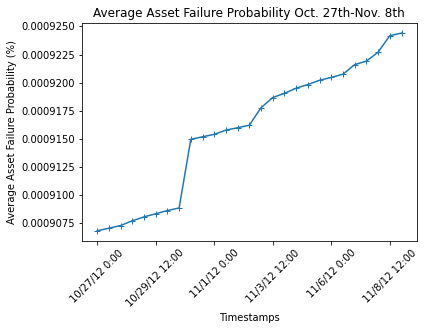

In [173]:
avg_asset_fail = df_assets.drop(['reference', 'longitude', 'latitude'], axis=1).apply(np.mean)
plt.figure()
avg_asset_fail.plot(title='Average Asset Failure Probability Oct. 27th-Nov. 8th', rot=45, marker='+')
plt.xlabel('Timestamps')
plt.ylabel('Average Asset Failure Probability (%)')
plt.plot()

Finding the highest failure probability for each asset

In [99]:
df_timestamps = df_assets.drop(['reference','longitude', 'latitude'], axis=1)
df_timestamps.apply(np.max, axis=1).describe()

count    2.100000e+03
mean     9.244133e-04
std      7.683721e-03
min      1.950000e-07
25%      4.267500e-05
50%      1.006615e-04
75%      2.025275e-04
max      1.949736e-01
dtype: float64

## Plotting failure probability over time for the first few assets

[]

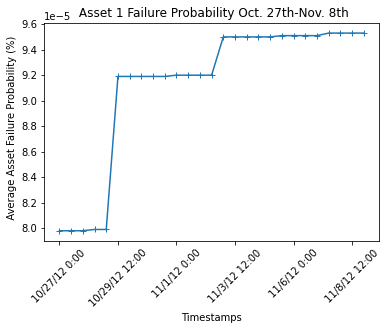

In [176]:
plt.figure()
df_timestamps.loc[0, : ].plot(title=' Asset 1 Failure Probability Oct. 27th-Nov. 8th', rot=45, marker='+')
plt.xlabel('Timestamps')
plt.ylabel('   Average Asset Failure Probability (%)')
plt.plot()

Finding which assets have highest failure probability at each timestamp:

In [102]:
df_timestamps.apply(np.max)

10/27/12 0:00     0.194043
10/27/12 12:00    0.194079
10/28/12 0:00     0.194115
10/28/12 12:00    0.194150
10/29/12 0:00     0.194186
10/29/12 12:00    0.194222
10/30/12 0:00     0.194258
10/30/12 12:00    0.194294
10/31/12 0:00     0.194329
10/31/12 12:00    0.194365
11/1/12 0:00      0.194401
11/1/12 12:00     0.194437
11/2/12 0:00      0.194472
11/2/12 12:00     0.194508
11/3/12 0:00      0.194544
11/3/12 12:00     0.194580
11/4/12 0:00      0.194616
11/4/12 12:00     0.194651
11/5/12 0:00      0.194687
11/5/12 12:00     0.194723
11/6/12 0:00      0.194759
11/6/12 12:00     0.194795
11/7/12 0:00      0.194830
11/7/12 12:00     0.194866
11/8/12 0:00      0.194902
11/8/12 12:00     0.194938
11/9/12 0:00      0.194974
dtype: float64

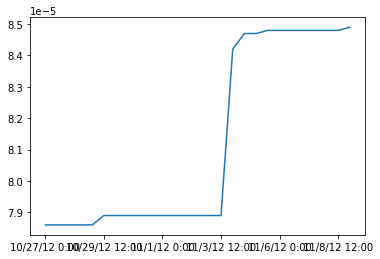

In [96]:
df_timestamps.loc[1, : ].plot()

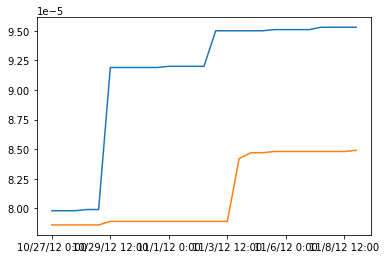

In [118]:
for _ in range(2): 
    df_timestamps.loc[_, : ].plot()

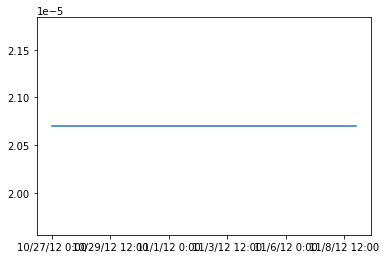

In [123]:
# Same probability throughout -> not registering/updating?
df_timestamps.loc[2, : ].plot()

## Visualizing all assets geographically

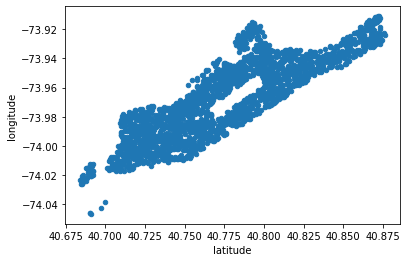

In [111]:
# Scatterplot as a test to visualize assets geographically-> matches with streamlit geo plot!  
df_assets.plot.scatter(x='latitude', y='longitude')

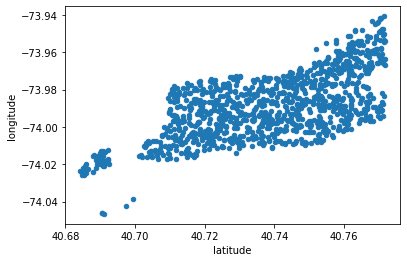

In [128]:
# 3rd quadrant
df_assets[(df_assets['longitude'] < -73.93843) & (df_assets['latitude'] < 40.771777)].plot.scatter(x='latitude', y='longitude')

## Extreme/Outlier failure probability exploration

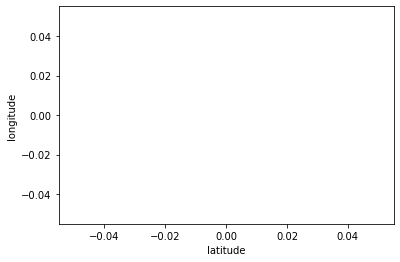

In [135]:
# 2nd quadrant 
df_assets[(df_assets['longitude'] > -73.93843) & (df_assets['latitude'] < 40.771777)].plot.scatter(x='latitude', y='longitude')

[]

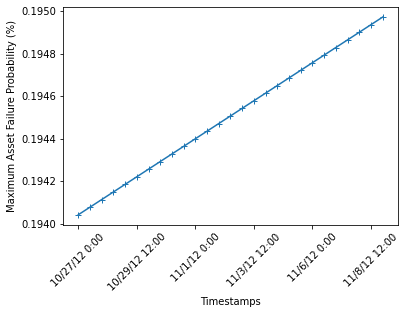

In [186]:
# Necessary?
plt.figure()
df_timestamps.apply(np.max).plot(rot=45, marker='+')
plt.xlabel('Timestamps')
plt.ylabel('Maximum Asset Failure Probability (%)')
plt.plot()

[]

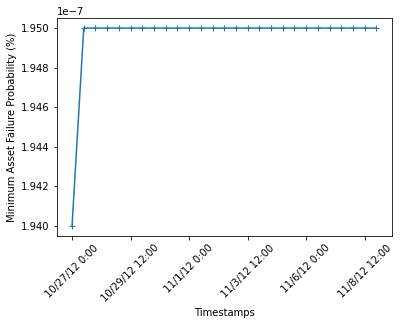

In [188]:
plt.figure()
df_timestamps.apply(np.min).plot(rot=45, marker='+')
plt.xlabel('Timestamps')
plt.ylabel('Minimum Asset Failure Probability (%)')
plt.plot()

In [163]:
top_50 = df_assets.sort_values(by='11/9/12 0:00', ascending=False)
top_50[0:50][['longitude', 'latitude']]

,longitude,latitude
1354,-73.917163,40.790896
986,-73.988286,40.758487
65,-73.941500,40.816659
1141,-73.997352,40.755995
189,-74.010296,40.711857
940,-73.956731,40.775849
688,-73.988575,40.729296
420,-73.958292,40.817908
1450,-73.940583,40.837362
879,-73.956279,40.821434


In [155]:
df_assets.loc[(df_assets['10/27/12 0:00'] > df_assets['10/27/12 0:00'].mean())][['longitude','latitude']]


,longitude,latitude
5,-73.978883,40.753527
7,-73.935742,40.831891
21,-73.964632,40.775555
23,-73.965616,40.804763
28,-73.949891,40.830166
...,...,...
1890,-73.950021,40.771416
1933,-73.945350,40.815153
1989,-73.944155,40.851519
2086,-73.914417,40.868081
